### Importing the Libraries

In [1]:
#supress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Data reading

In [3]:
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df.shape

(9240, 37)

In [5]:
# Check summary of all numerical columns to understand the dataset better in terms of spread and 

df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# checking number of unique values in each column
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [7]:
# Check data types of columns and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [8]:
#Checking for count of missing values in each column
df.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
Tags                                             3353
What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Do Not Email                                        0
Do Not Call                 

### Data Cleaning

In [9]:
# Check for duplicate rows
print(df.duplicated().sum())

0


In [10]:
# List of columns having 'Select' as value
cols_with_select_value = [col for col in df.columns if 'Select' in df[col].values]
print(cols_with_select_value)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [11]:
# Converting 'Select' values to NaN.
df = df.replace('Select', np.nan)

# Checking if all 'Select' values have been handled in the columns
cols_with_select_value = [col for col in df.columns if 'Select' in df[col].values]
print(cols_with_select_value)

[]


In [12]:
# Calculating Missing Values Percentage
100*(df.isna().mean()).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [13]:
# user defined function to drop columns and know the shape before and after dropping
def dropNullColumns(data, percentage=40):
    
    missing_perc = 100*(data.isna().mean()).sort_values(ascending=False)
    col_to_drop = missing_perc[missing_perc>=percentage].index.to_list()
    
    data.drop(labels=col_to_drop,axis=1, inplace=True)    

In [14]:
dropNullColumns(df)

In [15]:
# Checking the percentage of null values for remaining columns
100*(df.isna().mean()).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Lead Number                                       0.000000
Lead Origin                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
Total Time Spent on Website                       0.000000
Last Notable Activity                             0.0000

In [16]:
# Select the columns with non-numeric data type
categorical_cols = df.select_dtypes(include=['category', 'object']).columns.tolist()

# Print the selected columns
print(categorical_cols)

['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [17]:
columnsList = ['City', 'Specialization', 'Tags',
               'What matters most to you in choosing a course',
               'What is your current occupation', 'Country',
               'Last Activity', 'Lead Source']

for col in columnsList:
    print("Value counts for column:", col)
    print(df[col].value_counts(normalize=True) * 100)
    print("___"*40, "\n")

Value counts for column: City
Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64
________________________________________________________________________________________________________________________ 

Value counts for column: Specialization
Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Manage

In [18]:
# Dropping Columns with a reason

df.drop(['City', # Having nearing 40% null values
         'Tags', # It is just the current status of the customer, not good for analysis
         'What matters most to you in choosing a course', # It seems to be skewed
         'Country', # It seems to be skewed
         'What is your current occupation'], # As it is not specified for 29% and has 85% Unemployed if we add the missing values as "Unemployed" to this category then it becomes skewed
        axis=1, inplace=True)
print(df.shape)

(9240, 25)


In [19]:
# Imputing values as per the above observations/insights

missing_values={'Specialization':'Unknown',
                'Lead Source':'Google',
                'Last Activity':'Email Opened',
                }
df=df.fillna(value=missing_values)

In [20]:
# Re Checking the percentage of null values for remaining columns

round(((df.isnull().sum()/df.shape[0])*100),2).sort_values(ascending=False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Last Notable Activity                       0.00
Specialization                              0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.00
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
Total Time Spent on Website                 0.00
Last Activity                               0.00
Search                                      0.00
A free copy of Mastering The Interview      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates

In [21]:
# TotalVisits

print("TotalVisits - Value Counts")
print("----------------------------------------")
df.TotalVisits.value_counts().head(10)

TotalVisits - Value Counts
----------------------------------------


0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

In [22]:
# TotalVisits missing values to be imputed with mode

df['TotalVisits'].fillna(df['TotalVisits'].mode()[0], inplace=True)

In [23]:
# Page Views Per Visit

print("Page Views Per Visit - Value Counts")
print("----------------------------------------")
df.TotalVisits.value_counts().head(10)

Page Views Per Visit - Value Counts
----------------------------------------


0.0    2326
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

In [24]:
# Page Views Per Visit missing values to be imputed with mode

df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].mode()[0], inplace=True)

In [25]:
# Re Checking the percentage of null values after handling categorical and numerical columns

round(((df.isnull().sum()/df.shape[0])*100),2).sort_values(ascending=False)

Last Notable Activity                       0.0
Specialization                              0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Search                                      0.0
A free copy of Mastering The Interview      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

In [26]:
# Last Notable Activity

print("Last Notable Activity")
print("----------------------------------------")
100*df['Last Notable Activity'].value_counts(normalize=True)

Last Notable Activity
----------------------------------------


Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Resubscribed to emails           0.010823
Approached upfront               0.010823
Form Submitted on Website        0.010823
View in browser link Clicked     0.010823
Email Received                   0.010823
Name: Last Notable Activity, dtype: float64

In [27]:
#check for columns with one unique value, count and freq is same

df.describe(include = 'object')

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240
unique,9240,5,21,2,2,17,19,2,1,2,2,2,2,2,1,1,1,1,2,16
top,e72d8dd9-e2ba-4cd4-8daa-1a7f6ce85c9e,Landing Page Submission,Google,No,No,Email Opened,Unknown,No,No,No,No,No,No,No,No,No,No,No,No,Modified
freq,1,4886,2904,8506,9238,3540,3380,9226,9240,9238,9239,9239,9236,9233,9240,9240,9240,9240,6352,3407


In [28]:
# List of columns with one unique value whose count and frequency are same, we will drop these columns

cols_to_drop = ['Magazine',
                'Receive More Updates About Our Courses',
                'Update me on Supply Chain Content',
                'Get updates on DM Content',
                'I agree to pay the amount through cheque']

df.drop(cols_to_drop, axis = 1, inplace = True)
print(df.shape)

(9240, 20)


In [29]:
# Dropping Columns
print("Before Dropping Columns",df.shape)
df.drop(['Prospect ID','Lead Number','Last Notable Activity'],axis=1,inplace=True)
print("After Dropping Columns",df.shape)

Before Dropping Columns (9240, 20)
After Dropping Columns (9240, 17)


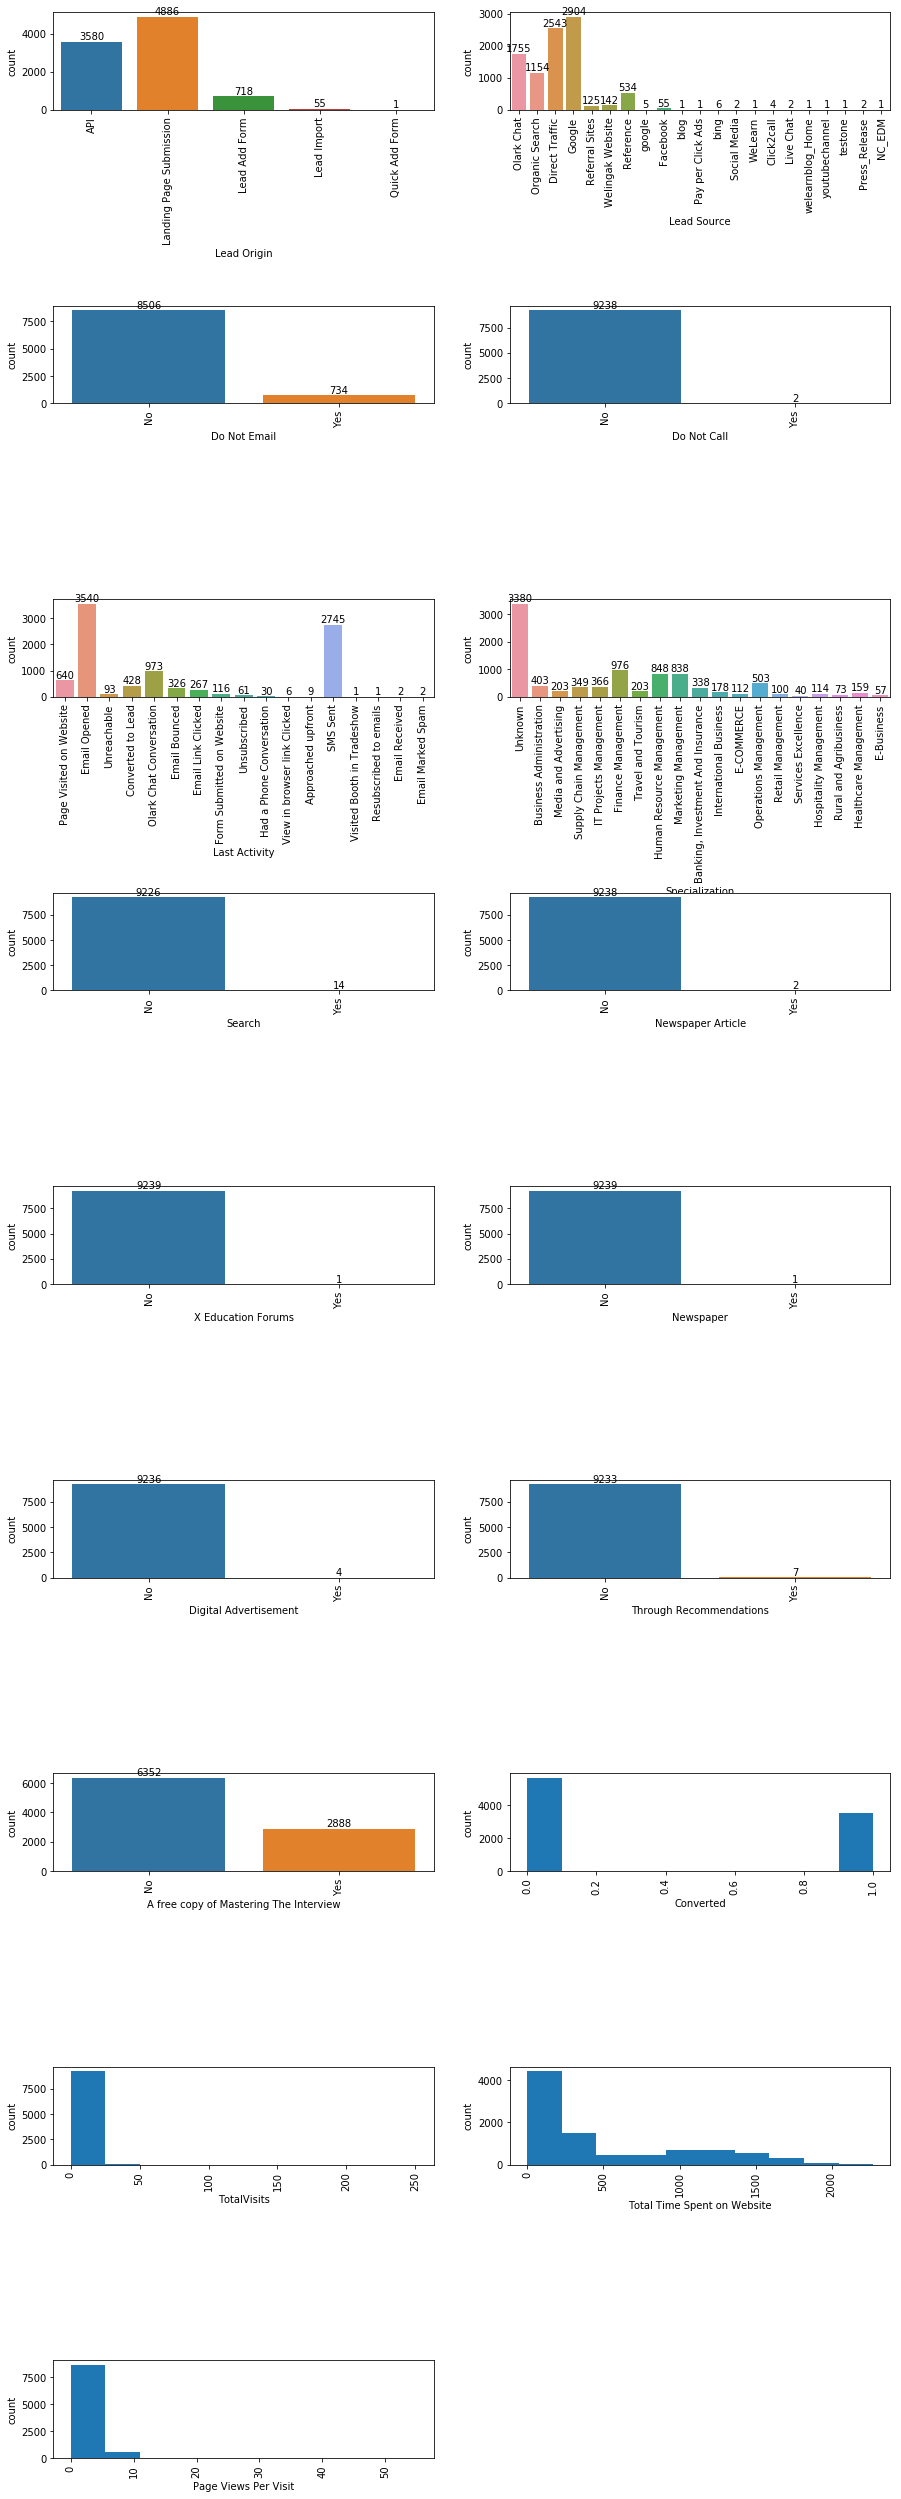

In [30]:
# Select categorical columns
categorical_col = df.select_dtypes(include=['category', 'object']).columns.tolist()

# Select numeric columns
numeric_col = df.select_dtypes(include=['number']).columns.tolist()

# Calculate the total number of subplots required
total_plots = len(categorical_col) + len(numeric_col)

# Determine the grid size (rows and columns)
n_cols = 2
n_rows = (total_plots + n_cols - 1) // n_cols

# Set up the figure and adjust space
plt.figure(figsize=(15, n_rows * 5))
plt.subplots_adjust(wspace=.2, hspace=2)

# Plot countplots for categorical columns
for i, col in enumerate(categorical_col):
    plt.subplot(n_rows, n_cols, i + 1)
    ax = sns.countplot(x=col, data=df)
    plt.xticks(rotation=90)

    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Plot histograms for numeric columns
for j, col in enumerate(numeric_col, start=len(categorical_col)):
    plt.subplot(n_rows, n_cols, j + 1)
    ax = plt.hist(df[col])
    plt.xlabel(col)
    plt.ylabel("count")
    plt.xticks(rotation=90)

plt.show()

In [31]:
# Dropping categorical columns with highly skewed data

df.drop(['Do Not Call',
         'Search',
         'Newspaper Article',
         'X Education Forums',
         'Newspaper',
         'Digital Advertisement',
         'Through Recommendations'],axis=1,inplace=True)

print(df.shape)

(9240, 10)


In [32]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unknown,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unknown,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unknown,No


In [33]:
def Check_Outliers(data, columnList):
    num_columns = len(columnList)
    
    # Determine the number of rows and columns for subplots
    n_cols = 2
    n_rows = (num_columns + n_cols - 1) // n_cols
    
    plt.figure(figsize=[22, 5 * n_rows])
    plt.subplots_adjust(wspace=0.4, hspace=0.5)
    
    for i, col in enumerate(columnList):
        plt.subplot(n_rows, n_cols, i + 1)
        
        sns.boxplot(y=data[col])
        
        plt.suptitle("\nChecking Outliers using Boxplot", fontsize=20, color="orange")
        plt.ylabel(None)
        plt.title(col, fontsize=15, color='red')
    
    plt.show()

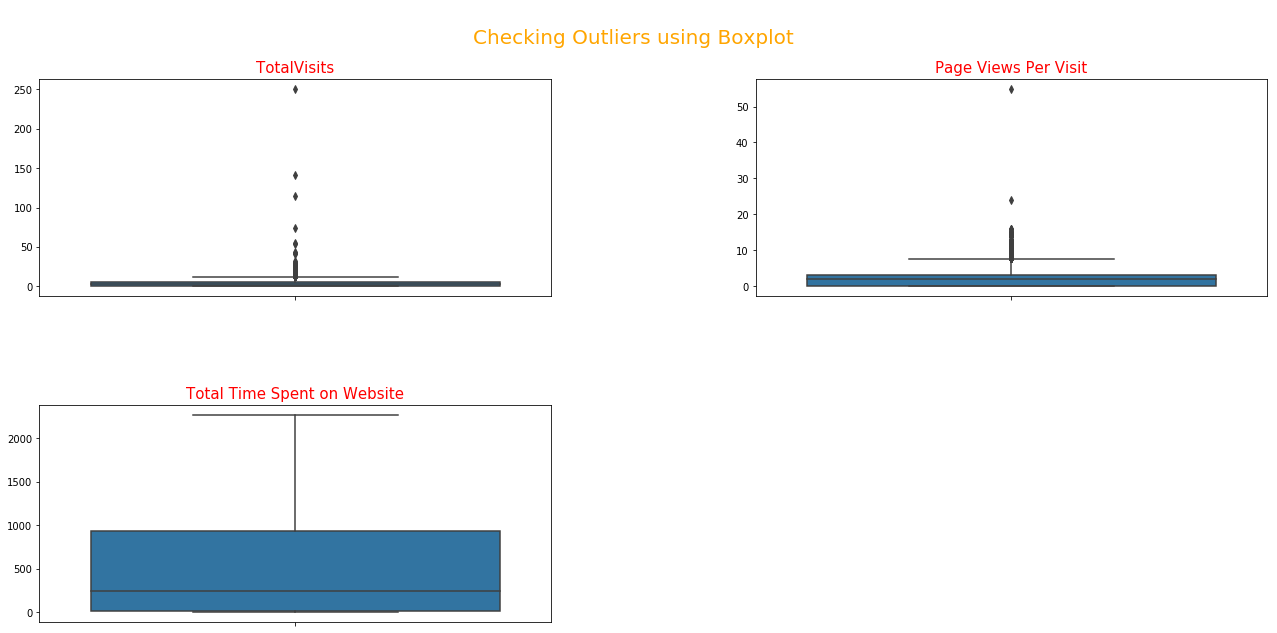

In [34]:
# Checking outliers for numerical variables other than target variable 

num_cols = ["TotalVisits",
            "Page Views Per Visit",
            "Total Time Spent on Website"]
 
Check_Outliers(df,num_cols)

In [35]:
# before outlier treatment

df.describe(percentiles=[.10,.25,.50,.75,.95])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.394156,487.698268,2.327787
std,0.486714,4.836682,548.021466,2.164258
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
95%,1.000000,10.000000,1562.000000,6.000000
max,1.000000,251.000000,2272.000000,55.000000


In [36]:
# Defining UDF to treat outliers via capping and flooring

def Outlier_treatment(df, columnList):
    for col in columnList:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        IQR = q3 - q1

        upper_bound = q3 + 1.5 * IQR
        lower_bound = q1 - 1.5 * IQR

        # Capping upper bound
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

        # Flooring lower bound
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])

In [37]:
# Checking outliers for numerical variables other than target variable 

capping_cols = ["TotalVisits",
                "Page Views Per Visit"]

# UDF 
Outlier_treatment(df,capping_cols)

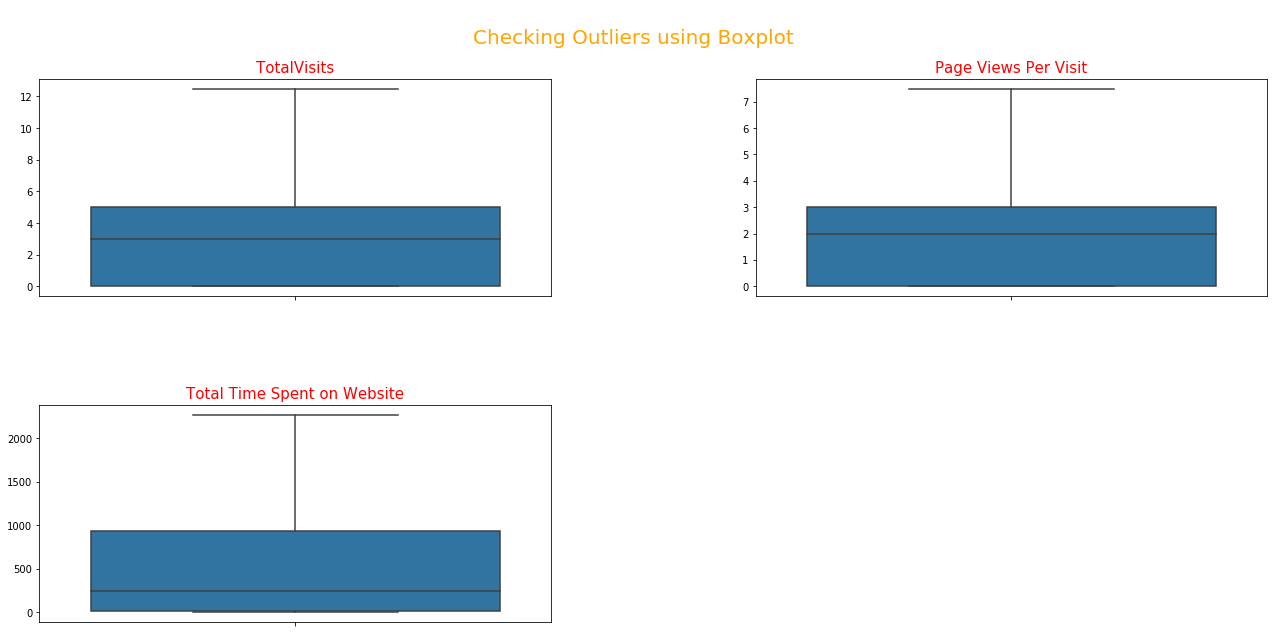

In [38]:
# Checking Boxplot after Outlier Treatment

num_cols = ["TotalVisits",
            "Page Views Per Visit",
            "Total Time Spent on Website"]

# UDF for boxplot
Check_Outliers(df,num_cols)

In [39]:
# after outlier treatment detailed percentile values

df.describe(percentiles=[.10,.25,.50,.75,.95])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.213853,487.698268,2.274987
std,0.486714,3.005136,548.021466,1.917776
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
95%,1.000000,10.000000,1562.000000,6.000000
max,1.000000,12.500000,2272.000000,7.500000


In [40]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unknown,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unknown,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unknown,No


In [41]:
## Categorical Variables 

columnsList_cat = [
    "Lead Origin",
    "Lead Source",
    "Do Not Email",
    "Last Activity",
    "Specialization",
    "A free copy of Mastering The Interview"
]

for col in columnsList_cat:
    print("Value counts for column:", col)
    print(df[col].value_counts(normalize=True) * 100)
    print("___"*40, "\n")

Value counts for column: Lead Origin
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64
________________________________________________________________________________________________________________________ 

Value counts for column: Lead Source
Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Live Chat             0.021645
Social Media          0.021645
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
welearnblog_Home      0.010823
youtubechannel        0.01

In [42]:
# Grouping low frequency value levels to Others

df['Lead Source'] = df['Lead Source'].replace(
    [
        "bing",
        "Click2call",
        "Press_Release",
        "Social Media",
        "Live Chat",
        "youtubechannel",
        "testone",
        "Pay per Click Ads",
        "welearnblog_Home",
        "WeLearn",
        "blog",
        "NC_EDM"
    ], 
    "Others"
)

# Changing 'google' to 'Google'
df['Lead Source'] = df['Lead Source'].replace("google", "Google")

In [43]:
# value_counts percentage after replace

df["Lead Source"].value_counts(normalize=True)*100

Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.248918
Name: Lead Source, dtype: float64

In [44]:
# Grouping low frequency value levels to Others 

df['Last Activity'] = df['Last Activity'].replace(
    [
        'Unreachable',
        'Unsubscribed',
        'Had a Phone Conversation',
        'Approached upfront',
        'View in browser link Clicked',
        'Email Marked Spam',
        'Email Received',
        'Visited Booth in Tradeshow',
        'Resubscribed to emails'
    ], 
    'Others'
)

In [45]:
# value_counts percentage after replace

df['Last Activity'].value_counts(normalize=True)*100

Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Others                        2.218615
Form Submitted on Website     1.255411
Name: Last Activity, dtype: float64

In [46]:
# Renaming column name to "Free_copy" from "A free copy of Mastering The Interview"
df.rename(columns={'A free copy of Mastering The Interview': 'Free_copy'}, inplace=True)

In [47]:
# Mapping binary categorical variables (Yes/No to 1/0) 
df['Do Not Email'] = df['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)

df['Free_copy'] = df['Free_copy'].apply(lambda x: 1 if x =='Yes' else 0)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 10 columns):
Lead Origin                    9240 non-null object
Lead Source                    9240 non-null object
Do Not Email                   9240 non-null int64
Converted                      9240 non-null int64
TotalVisits                    9240 non-null float64
Total Time Spent on Website    9240 non-null int64
Page Views Per Visit           9240 non-null float64
Last Activity                  9240 non-null object
Specialization                 9240 non-null object
Free_copy                      9240 non-null int64
dtypes: float64(2), int64(4), object(4)
memory usage: 722.0+ KB


### Verify Data Imbalance

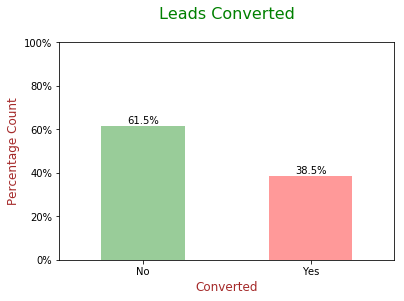

In [49]:
# Plotting the results on a bar plot
ax = (100 * df["Converted"].value_counts(normalize=True)).plot.bar(color=["Green", "Red"], alpha=0.4)

# Adding and formatting title
plt.title("Leads Converted\n", fontdict={'fontsize': 16, 'fontweight': 12, 'color': 'Green'})

# Labeling Axes
plt.xlabel('Converted', fontdict={'fontsize': 12, 'fontweight': 20, 'color': 'Brown'})
plt.ylabel("Percentage Count", fontdict={'fontsize': 12, 'fontweight': 20, 'color': 'Brown'})

# Modifying ticks on y-axis
ticks = np.arange(0, 101, 20)
labels = ["{:.0f}%".format(i) for i in ticks]
plt.yticks(ticks, labels)

# Modifying x-ticks
plt.xticks([0, 1], ["No", "Yes"], rotation=0)

# Adding percentage annotations on the bars
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), textcoords='offset points')

# Displaying the plot
plt.show()

In [50]:
# Ratio of Data Imbalance
ratio=(df["Converted"].value_counts(normalize=True).loc[0])/(df["Converted"].value_counts(normalize=True).loc[1])

print("Data Imbalance Ratio : {:.2f} : {}".format(ratio,1))

Data Imbalance Ratio : 1.59 : 1


In [51]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Free_copy
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unknown,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unknown,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unknown,0


### EDA

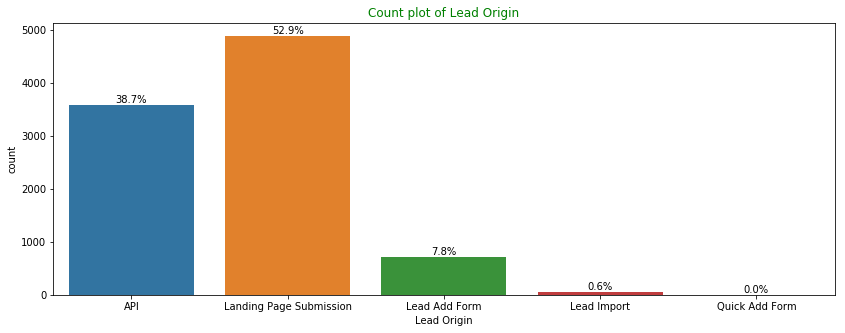

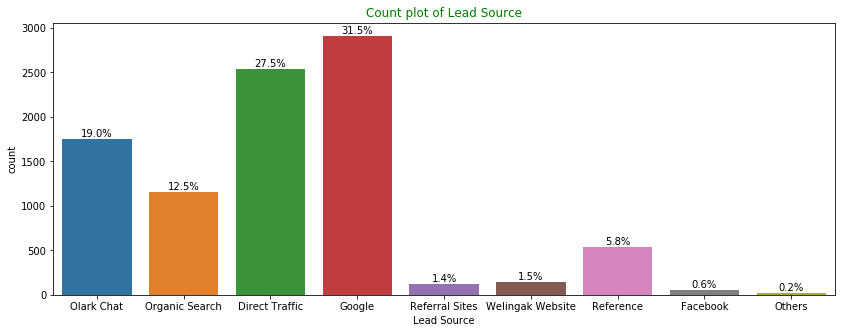

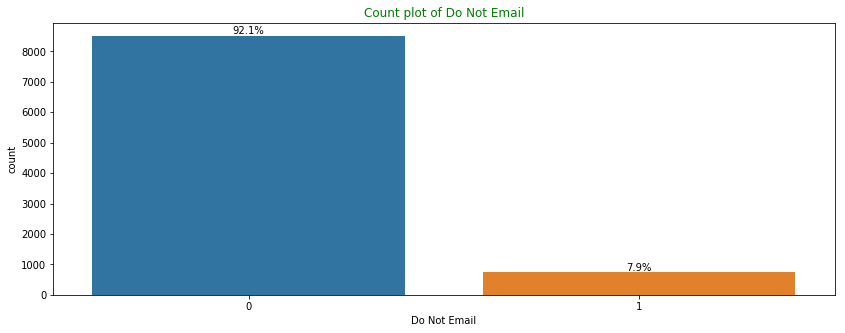

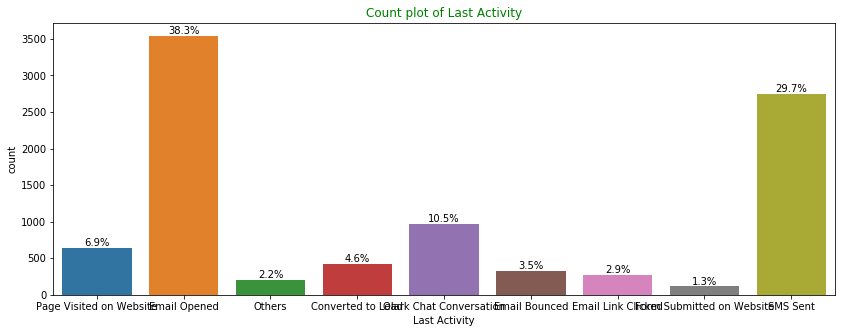

In [52]:
# List of categorical columns to plot
cat_cols = [
    "Lead Origin", 
    "Lead Source", 
    "Do Not Email", 
    "Last Activity",
    "Specialization",
    "Free_copy"
]

# Plotting count plots with value_counts percentages as annotations
for col in cat_cols[:4]:  # Adjust this range if you want to plot more/less columns
    plt.figure(figsize=[14, 5])
    plt.title(f"Count plot of {col}", color="green")
    ax = sns.countplot(x=col, data=df)
    
    total = len(df[col])
    plt.xticks(rotation=0)
    
    for p in ax.patches:
        percentage = 100 * p.get_height() / total
        text = f'{percentage:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        
        ax.annotate(text, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
    plt.show()

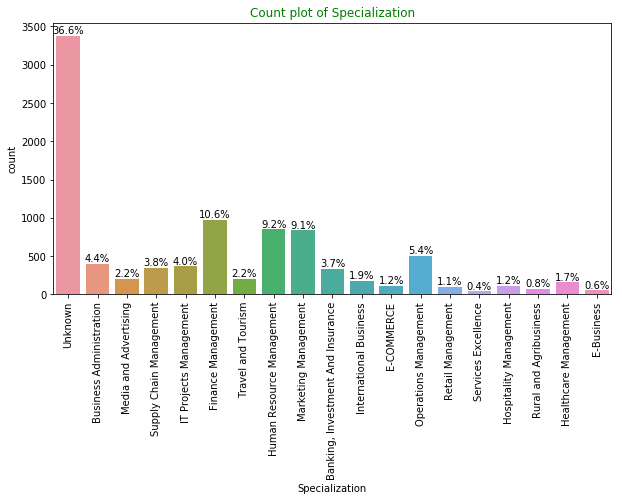

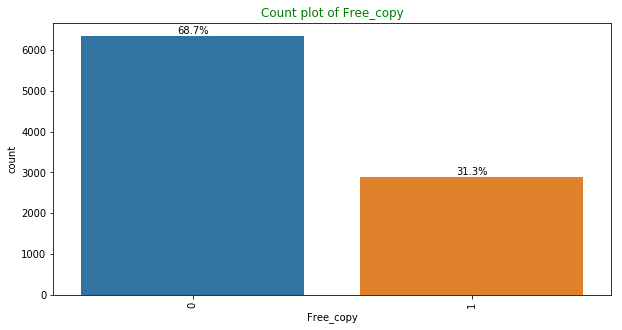

In [53]:
# Bar plot for remaining columns from cat_cols with rotated x-ticks
for col in cat_cols[4:]:
    plt.figure(figsize=[10, 5])
    plt.title(f"Count plot of {col}", color="green")
    ax = sns.countplot(x=col, data=df)
    total = len(df[col])
    plt.xticks(rotation=90)

    for p in ax.patches:
        text = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        ax.annotate(text, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    plt.show()

In [54]:
# UDF "Bivariate_cat" tells comparision between Actual Distribution (value_count percentage) from the data and 
# 2nd graph tell the Lead Conversion Rate in percentage (how much leads are converted from 1st plot distribution)

def Bivariate_cat(df, variable_name, Target="Converted"):
    plt.figure(figsize=(20, 6))
    plt.suptitle("{} Countplot vs Lead Conversion Rates".format(variable_name), color="Brown", fontsize=18)

    # 1st plot in subplot
    plt.subplot(1, 2, 1)
    plt.title("Distribution of {}".format(variable_name), color="blue")
    ax = sns.countplot(x=variable_name, hue=Target, data=df, palette="prism_r", alpha=0.46)

    total = len(df[variable_name])
    plt.xticks(rotation=90)
    plt.legend(["No", "Yes"], title="Converted")

    # Annotation for 1st plot
    for p in ax.patches:
        text = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        ax.annotate(text, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    # 2nd plot
    plt.subplot(1, 2, 2)
    plt.title("Lead Conversion Rate of {}".format(variable_name), color="green", fontsize=12)
    ax = sns.barplot(x=variable_name, y=Target, data=df, palette="BuGn", alpha=0.85)

    # Modifications
    plt.xticks(rotation=90)
    plt.ylabel("Conversion Rate (%)", color='brown')
    plt.xlabel("{}".format(variable_name))
    plt.legend(labels=["Not Converted", "Converted"], title="Lead Conversion Rate")

    # Annotation for 2nd plot
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height())
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

    plt.show()

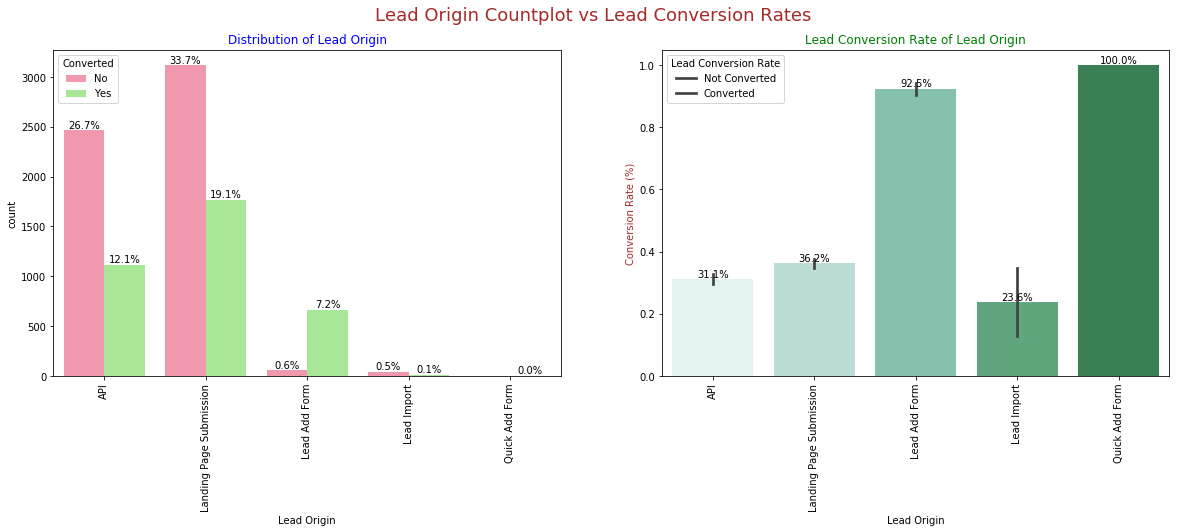

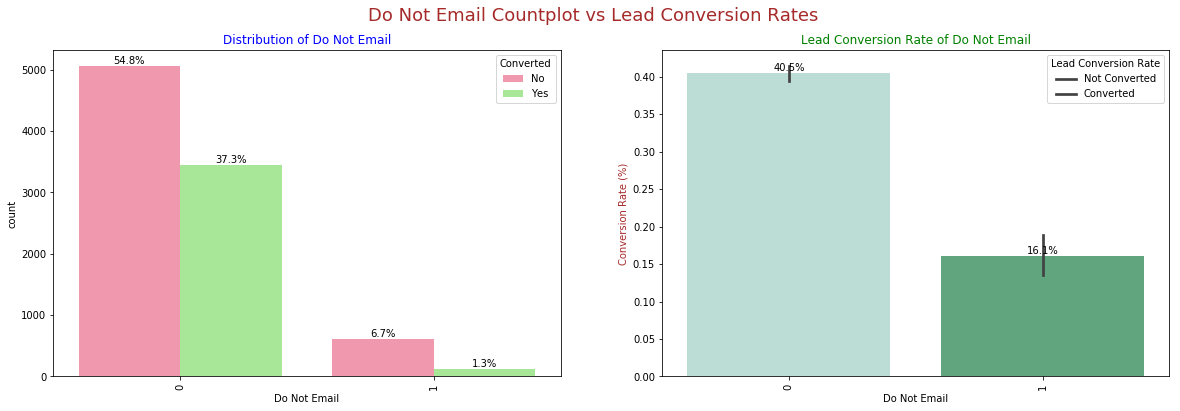

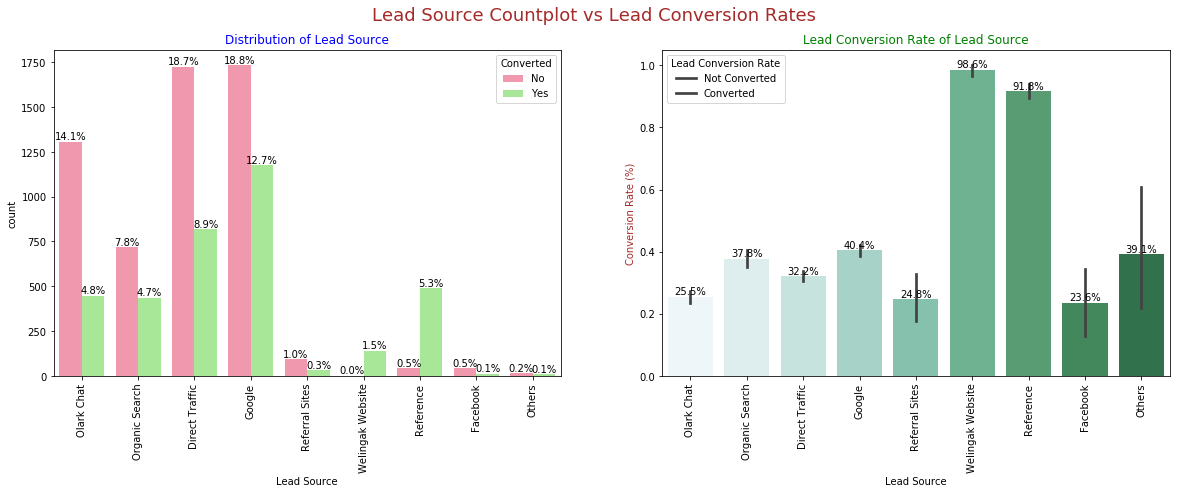

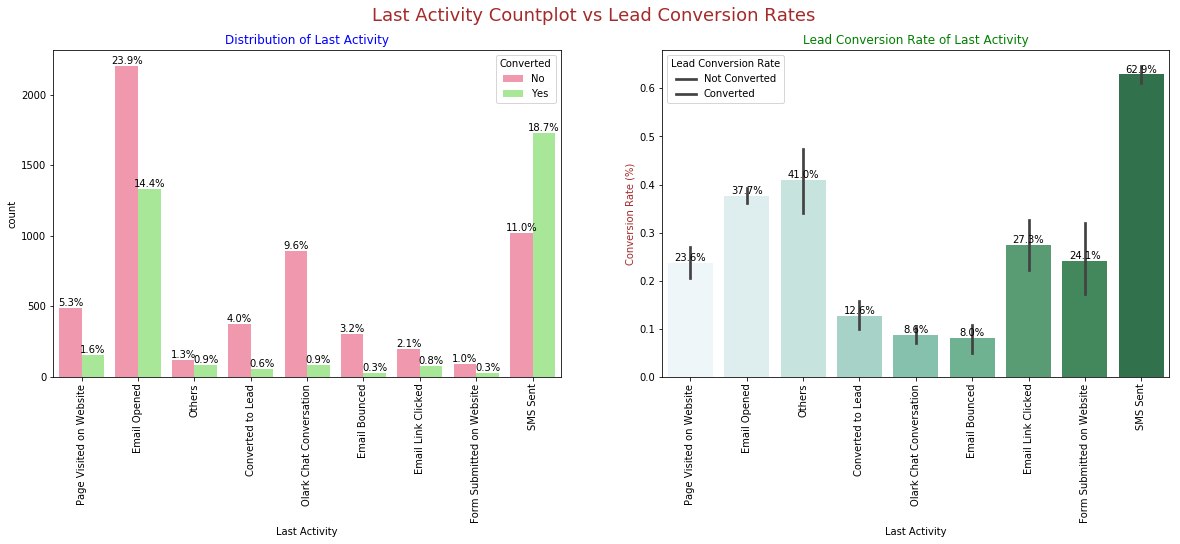

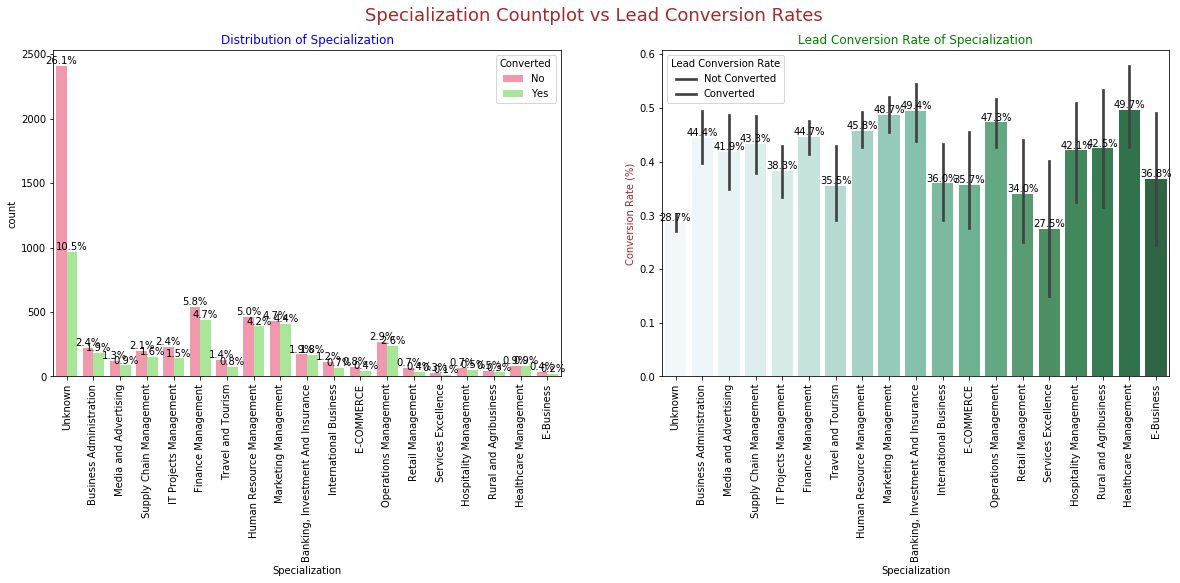

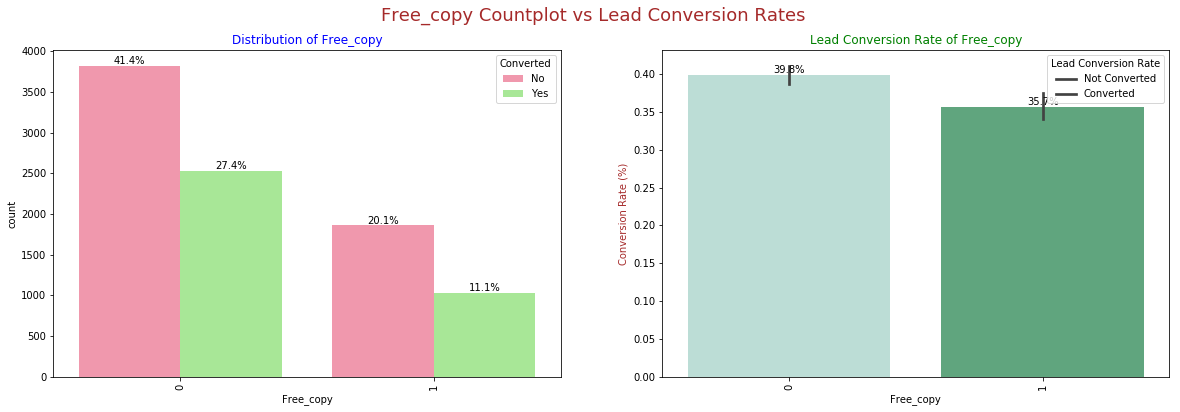

In [55]:
# Bivariate Analysis for all these variables using loop and UDF
# Comparision between variables w.r.t. 'Converted' (Target variable) , taking one categorical column w.r.t target variable as 'hue'
cat_cols = ["Lead Origin", "Do Not Email",
            "Lead Source", "Last Activity", "Specialization", "Free_copy"]

for col in cat_cols:
    Bivariate_cat(df, variable_name=col)

<Figure size 1152x288 with 0 Axes>

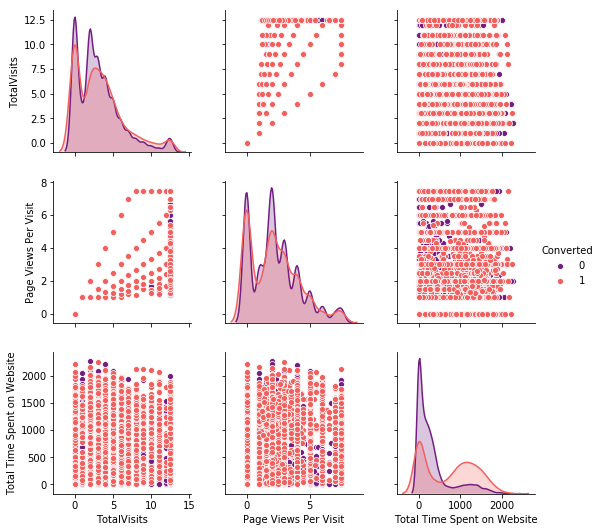

In [56]:
plt.figure(figsize=(16, 4))
sns.pairplot(data=df,vars=num_cols,hue="Converted", palette="magma")                                  
plt.show()

In [57]:
num_cols =['Converted', 'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

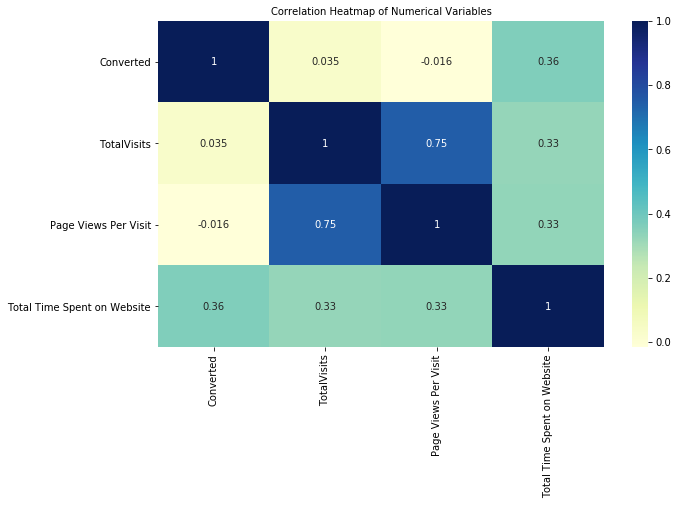

In [58]:
# Creating a heatmap to show correlation between numerical variables
plt.figure(figsize=(10, 6))
sns.heatmap(data=df[num_cols].corr(), cmap="YlGnBu", annot=True)
plt.title('Correlation Heatmap of Numerical Variables', fontsize=10)
plt.show()

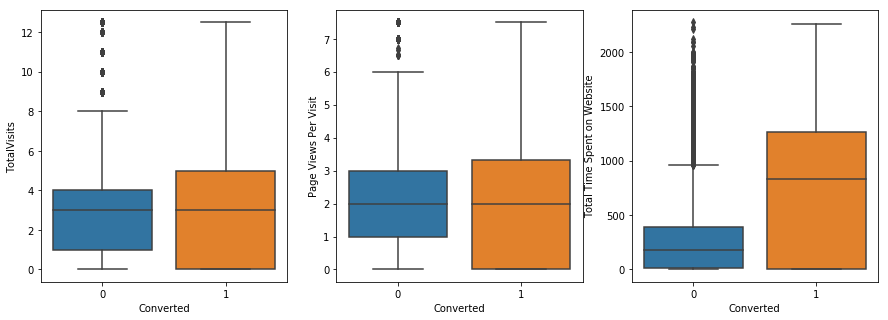

In [59]:
# Boxplot with Converted as hue
plt.figure(figsize=(15, 5))

# Boxplot for TotalVisits
plt.subplot(1, 3, 1)
sns.boxplot(y='TotalVisits', x='Converted', data=df)

# Boxplot for Page Views Per Visit
plt.subplot(1, 3, 2)
sns.boxplot(y='Page Views Per Visit', x='Converted', data=df)

# Boxplot for Total Time Spent on Website
plt.subplot(1, 3, 3)
sns.boxplot(y='Total Time Spent on Website', x='Converted', data=df)

plt.show()

In [60]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Free_copy
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unknown,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unknown,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unknown,0


### Creating Dummies

In [61]:
# Creating dummy variables for selected categorical columns
dummy = pd.get_dummies(df[["Lead Origin", "Lead Source", "Last Activity", "Specialization"]], 
                       drop_first=True)

# Adding the dummy variables to the master dataframe
df = pd.concat([df, dummy], axis=1)

# Dropping the original categorical columns
df.drop(["Lead Origin", "Lead Source", "Last Activity", "Specialization"], axis=1, inplace=True)

In [62]:
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,2.0,1532,2.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [63]:
df.shape

(9240, 44)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 44 columns):
Do Not Email                                9240 non-null int64
Converted                                   9240 non-null int64
TotalVisits                                 9240 non-null float64
Total Time Spent on Website                 9240 non-null int64
Page Views Per Visit                        9240 non-null float64
Free_copy                                   9240 non-null int64
Lead Origin_Landing Page Submission         9240 non-null uint8
Lead Origin_Lead Add Form                   9240 non-null uint8
Lead Origin_Lead Import                     9240 non-null uint8
Lead Origin_Quick Add Form                  9240 non-null uint8
Lead Source_Facebook                        9240 non-null uint8
Lead Source_Google                          9240 non-null uint8
Lead Source_Olark Chat                      9240 non-null uint8
Lead Source_Organic Search                  9240 non-null

In [65]:
# Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

### Test-Train Split

In [66]:
# Putting predictor variables to X
X = df.drop('Converted', axis=1)

# Putting Target variables to y
y = df["Converted"]

In [67]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [68]:
print("X_train:", X_train.shape,"\ny_train:",y_train.shape)

X_train: (6468, 43) 
y_train: (6468,)


In [69]:
print("X_test:", X_test.shape,"\ny_test:",y_test.shape)

X_test: (2772, 43) 
y_test: (2772,)


### Feature Scaling

In [70]:
# using standard scaler for scaling the features
scaler = StandardScaler()

# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_train.select_dtypes(include=['int64','float64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [71]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown
1871,-0.291638,-1.064974,-0.885371,-1.184892,-0.673169,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6795,-0.291638,0.262370,0.005716,-0.488713,1.485511,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3516,-0.291638,0.594206,-0.691418,0.123715,-0.673169,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8105,-0.291638,0.594206,1.365219,1.432322,-0.673169,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3934,-0.291638,-1.064974,-0.885371,-1.184892,-0.673169,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [72]:
# Checking the Lead Conversion Rate (LCR) - "Converted" is our Target Variable
# We will denote Lead Conversion Rate with 'LCR' as its short form

LCR = (sum(df['Converted'])/len(df['Converted'].index))*100
LCR

38.53896103896104

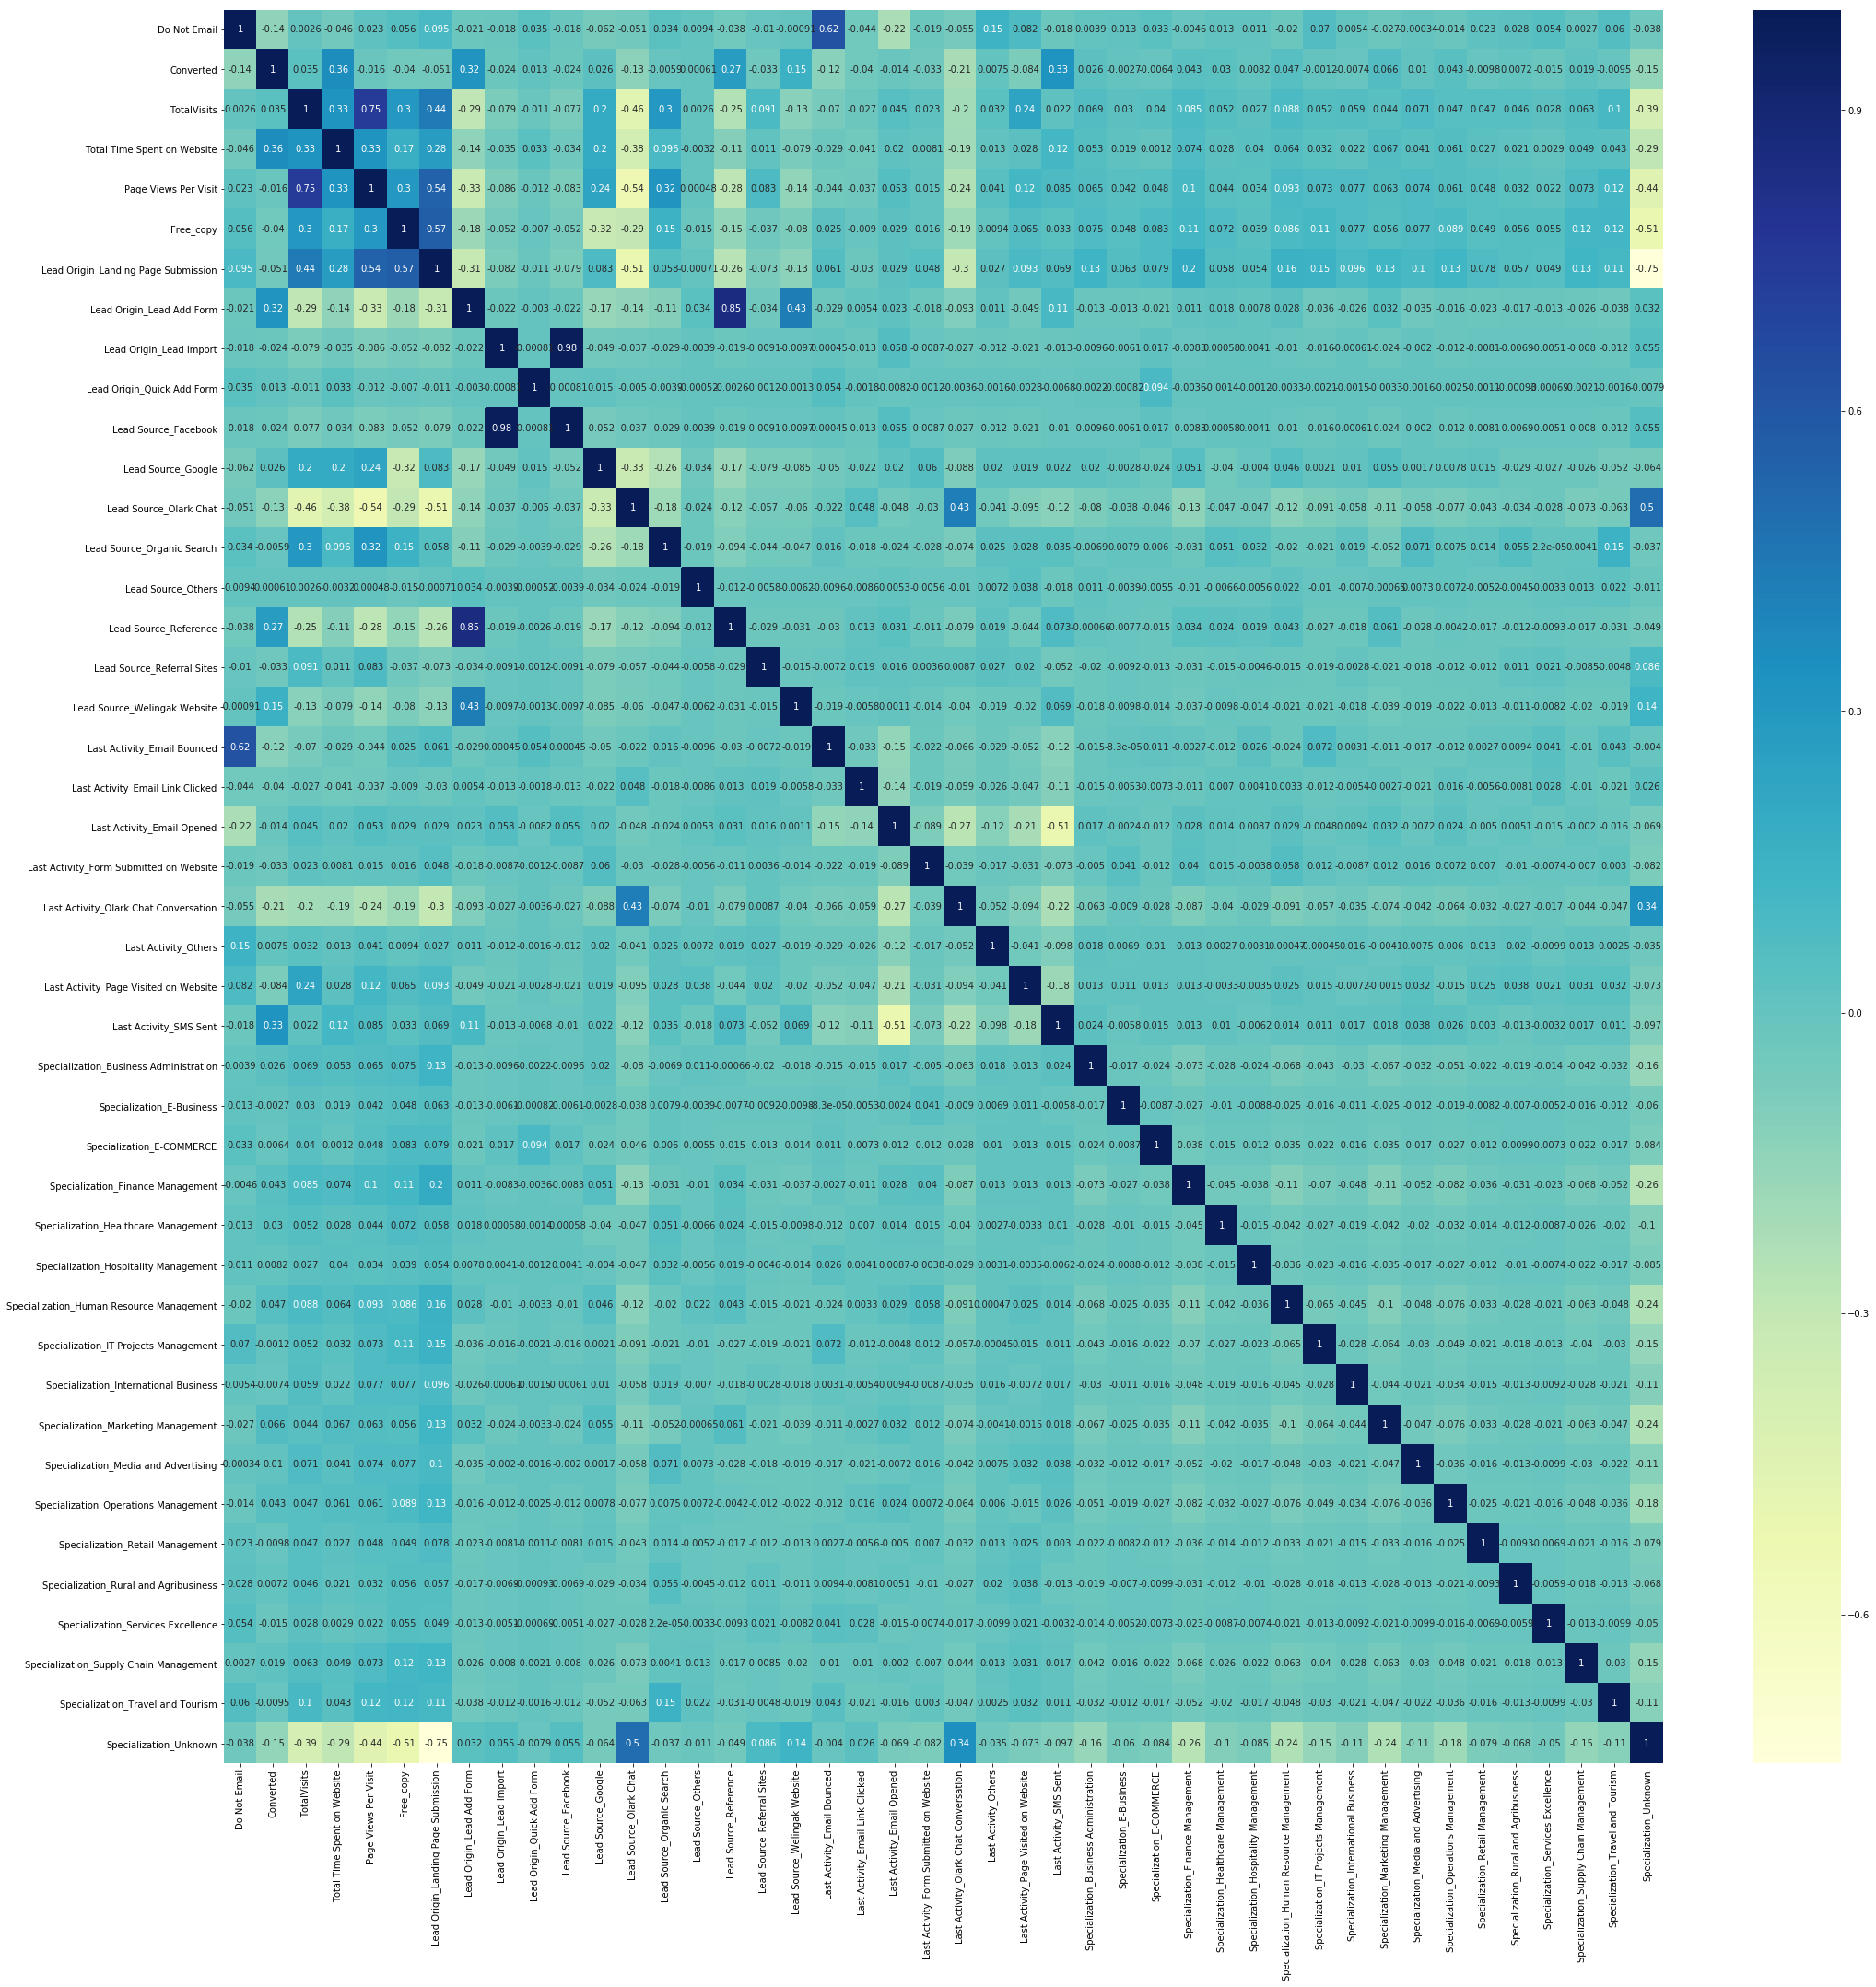

In [73]:
# Calculate the correlation matrix for the selected columns
corr_matrix_selected = df.corr()

# Plot the heatmap for the selected columns
plt.figure(figsize=(35, 35))
sns.heatmap(corr_matrix_selected, cmap="YlGnBu", annot=True)
plt.show()

In [74]:
# There are many variables so it is difficult to drop, so we can proceed with RFE

In [75]:
logreg=LogisticRegression()

In [76]:
rfe = RFE(logreg,n_features_to_select= 15)            
rfe = rfe.fit(X_train, y_train)

In [77]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 2),
 ('TotalVisits', False, 5),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 6),
 ('Free_copy', False, 13),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 7),
 ('Lead Origin_Quick Add Form', False, 14),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 20),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 24),
 ('Lead Source_Others', False, 18),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 23),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 19),
 ('Last Activity_Email Link Clicked', False, 4),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 25),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 15),
 ('Last 

In [78]:
col = X_train.columns[rfe.support_]

In [79]:
X_train.columns[rfe.support_]

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Facebook',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Hospitality Management',
       'Specialization_International Business',
       'Specialization_Rural and Agribusiness', 'Specialization_Unknown'],
      dtype='object')

In [80]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit', 'Free_copy',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management

In [81]:
X_train = X_train[col]

In [82]:
import statsmodels.api as sm

In [83]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res1 = logm1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2868.7
Date:                Mon, 17 Jun 2024   Deviance:                       5737.3
Time:                        21:02:40   Pearson chi2:                 6.68e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.7432      0.139     -5.342      0.000      -1.016      -0.470
Total Time Spent on Website               1.0854      0.038     28.401      0.000       1.010       1.160
Lead Origin_Landing Page Submission      -1.3370      0.123    -10.855      0.000      -1.578      -1.096
Lead Origin_Lead Add Form                 2.4430      0.460      5.313      0.000       1.542       3.344
Lead Source_Facebook                     -0.5880      0.519     -1.133      0.257      -1.606       0.430
Lead Source_Olark Chat                    1.0076      0.119      8.488      0.000       0.775       1.240
Lead Source_Reference                     0.6808      0.493      1.382      0.167      -0.285       1.647
Lead Source_Welingak Website              3.0247      0.853      3.546      0.000       1.353       4.696
Last Activity_Email Opened                0.9341      0.101      9.252      0.000       0.736       1.132
Last Activity_Olark Chat Conversation    -0.5448      0.182     -2.997      0.003      -0.901      -0.189
Last Activity_Others                      1.2612      0.231      5.469      0.000       0.809       1.713
Last Activity_SMS Sent                    2.0272      0.104     19.526      0.000       1.824       2.231
Specialization_Hospitality Management    -1.0016      0.304     -3.297      0.001      -1.597      -0.406
Specialization_International Business    -0.5257      0.244     -2.151      0.031      -1.005      -0.047
Specialization_Rural and Agribusiness     0.4726      0.366      1.290      0.197      -0.245       1.190
Specialization_Unknown                   -1.5299      0.119    -12.869      0.000      -1.763      -1.297
=========================================================================================================
"""

In [84]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [85]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[ variance_inflation_factor(X_train.values,i)  for i in range(X_train.shape[1]) ]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,15.91
5,Lead Source_Reference,12.92
6,Lead Source_Welingak Website,3.77
1,Lead Origin_Landing Page Submission,2.50
14,Specialization_Unknown,2.44
7,Last Activity_Email Opened,2.37
10,Last Activity_SMS Sent,2.17
4,Lead Source_Olark Chat,2.16
8,Last Activity_Olark Chat Conversation,1.72
0,Total Time Spent on Website,1.24


In [86]:
#First drop the variable Lead Origin_Lead Add Form since it has a high p-value as well as a high VIF.

X_train.drop('Lead Origin_Lead Add Form',axis=1,inplace=True)

In [87]:
# Refit the model with the new set of features

logm2 = sm.GLM(y_train, sm.add_constant(X_train), family = sm.families.Binomial())
res2 = logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2886.6
Date:                Mon, 17 Jun 2024   Deviance:                       5773.2
Time:                        21:02:41   Pearson chi2:                 6.65e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.6475      0.137     -4.720      0.000      -0.916      -0.379
Total Time Spent on Website               1.0662      0.038     28.184      0.000       0.992       1.140
Lead Origin_Landing Page Submission      -1.4251      0.122    -11.689      0.000      -1.664      -1.186
Lead Source_Facebook                     -0.6768      0.517     -1.309      0.191      -1.690       0.337
Lead Source_Olark Chat                    0.9118      0.117      7.825      0.000       0.683       1.140
Lead Source_Reference                     3.0179      0.211     14.289      0.000       2.604       3.432
Lead Source_Welingak Website              5.3636      0.728      7.363      0.000       3.936       6.791
Last Activity_Email Opened                0.9241      0.100      9.212      0.000       0.727       1.121
Last Activity_Olark Chat Conversation    -0.5697      0.181     -3.144      0.002      -0.925      -0.215
Last Activity_Others                      1.2839      0.229      5.610      0.000       0.835       1.732
Last Activity_SMS Sent                    2.0379      0.103     19.732      0.000       1.835       2.240
Specialization_Hospitality Management    -1.0034      0.304     -3.305      0.001      -1.598      -0.408
Specialization_International Business    -0.5365      0.244     -2.200      0.028      -1.015      -0.059
Specialization_Rural and Agribusiness     0.4654      0.366      1.272      0.203      -0.252       1.183
Specialization_Unknown                   -1.5368      0.118    -13.007      0.000      -1.768      -1.305
=========================================================================================================
"""

In [88]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,2.49
13,Specialization_Unknown,2.43
6,Last Activity_Email Opened,2.36
3,Lead Source_Olark Chat,2.15
9,Last Activity_SMS Sent,2.15
7,Last Activity_Olark Chat Conversation,1.72
0,Total Time Spent on Website,1.24
4,Lead Source_Reference,1.24
5,Lead Source_Welingak Website,1.09
8,Last Activity_Others,1.08


In [89]:
#All VIFs are now less than 5
#now we can drop the one with high p-value that is Specialization_Rural and Agribusiness 
X_train.drop('Specialization_Rural and Agribusiness',axis=1,inplace=True)

In [90]:
# Refit the model with the new set of features

logm3 = sm.GLM(y_train, sm.add_constant(X_train), family = sm.families.Binomial())
res3 = logm3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2887.4
Date:                Mon, 17 Jun 2024   Deviance:                       5774.8
Time:                        21:02:41   Pearson chi2:                 6.65e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.6399      0.137     -4.672      0.000      -0.908      -0.372
Total Time Spent on Website               1.0658      0.038     28.178      0.000       0.992       1.140
Lead Origin_Landing Page Submission      -1.4247      0.122    -11.691      0.000      -1.663      -1.186
Lead Source_Facebook                     -0.6781      0.517     -1.311      0.190      -1.692       0.336
Lead Source_Olark Chat                    0.9129      0.117      7.836      0.000       0.685       1.141
Lead Source_Reference                     3.0166      0.211     14.285      0.000       2.603       3.431
Lead Source_Welingak Website              5.3633      0.728      7.363      0.000       3.936       6.791
Last Activity_Email Opened                0.9220      0.100      9.197      0.000       0.726       1.119
Last Activity_Olark Chat Conversation    -0.5737      0.181     -3.167      0.002      -0.929      -0.219
Last Activity_Others                      1.2853      0.229      5.611      0.000       0.836       1.734
Last Activity_SMS Sent                    2.0348      0.103     19.721      0.000       1.833       2.237
Specialization_Hospitality Management    -1.0087      0.303     -3.324      0.001      -1.604      -0.414
Specialization_International Business    -0.5423      0.244     -2.224      0.026      -1.020      -0.064
Specialization_Unknown                   -1.5425      0.118    -13.069      0.000      -1.774      -1.311
=========================================================================================================
"""

In [91]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,2.48
12,Specialization_Unknown,2.43
6,Last Activity_Email Opened,2.36
3,Lead Source_Olark Chat,2.15
9,Last Activity_SMS Sent,2.15
7,Last Activity_Olark Chat Conversation,1.72
0,Total Time Spent on Website,1.24
4,Lead Source_Reference,1.24
5,Lead Source_Welingak Website,1.09
8,Last Activity_Others,1.08


In [92]:
#now we can drop the one with high p-value that is Specialization_Rural and Agribusiness 
X_train.drop('Lead Source_Facebook',axis=1,inplace=True)

In [93]:
# Refit the model with the new set of features

logm4 = sm.GLM(y_train, sm.add_constant(X_train), family = sm.families.Binomial())
res4 = logm4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2888.4
Date:                Mon, 17 Jun 2024   Deviance:                       5776.7
Time:                        21:02:42   Pearson chi2:                 6.65e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.6554      0.136     -4.805      0.000      -0.923      -0.388
Total Time Spent on Website               1.0684      0.038     28.269      0.000       0.994       1.142
Lead Origin_Landing Page Submission      -1.4068      0.121    -11.635      0.000      -1.644      -1.170
Lead Source_Olark Chat                    0.9306      0.116      8.032      0.000       0.703       1.158
Lead Source_Reference                     3.0364      0.211     14.413      0.000       2.623       3.449
Lead Source_Welingak Website              5.3805      0.728      7.388      0.000       3.953       6.808
Last Activity_Email Opened                0.9166      0.100      9.147      0.000       0.720       1.113
Last Activity_Olark Chat Conversation    -0.5734      0.181     -3.165      0.002      -0.929      -0.218
Last Activity_Others                      1.2859      0.229      5.611      0.000       0.837       1.735
Last Activity_SMS Sent                    2.0317      0.103     19.694      0.000       1.830       2.234
Specialization_Hospitality Management    -1.0198      0.303     -3.368      0.001      -1.613      -0.426
Specialization_International Business    -0.5404      0.244     -2.216      0.027      -1.018      -0.062
Specialization_Unknown                   -1.5388      0.118    -13.069      0.000      -1.770      -1.308
=========================================================================================================
"""

In [94]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,2.47
11,Specialization_Unknown,2.42
5,Last Activity_Email Opened,2.34
8,Last Activity_SMS Sent,2.14
2,Lead Source_Olark Chat,2.13
6,Last Activity_Olark Chat Conversation,1.72
0,Total Time Spent on Website,1.23
3,Lead Source_Reference,1.23
4,Lead Source_Welingak Website,1.08
7,Last Activity_Others,1.07


In [95]:
#Both p-vales and VIF are in good range now

In [96]:
def logreg_all_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    FPR = FP/(FP + TN)     
    FNR = FN/(FN +TP)
    
    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP) 
    
    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model True Negative Rate (TPR)   : ", round(TNR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))
    print ("Model False Negative Rate (FPR)  : ", round(FNR,4))

In [97]:
y_train_pred = res4.predict(sm.add_constant(X_train))
y_train_pred[:10]

1871    0.561147
6795    0.064268
3516    0.252423
8105    0.806603
3934    0.215354
4844    0.876512
3297    0.127266
8071    0.967312
987     0.175537
7423    0.875127
dtype: float64

In [98]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.56114679, 0.06426839, 0.25242277, 0.80660268, 0.21535415,
       0.87651232, 0.12726587, 0.96731231, 0.17553666, 0.87512693])

In [99]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.561147
1,0,0.064268
2,0,0.252423
3,0,0.806603
4,0,0.215354


In [100]:
#Created new column predicted if conversion_prob > 0.5 then 1 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.561147,1
1,0,0.064268,0
2,0,0.252423,0
3,0,0.806603,1
4,0,0.215354,0


In [101]:
#create confusion matrrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3543  459]
 [ 882 1584]]


In [102]:
logreg_all_metrics(confusion)

True Negative                    :  3543
True Positive                    :  1584
False Negative                   :  882
False Positve                    :  459
Model Accuracy                   :  0.7927
Model Sensitivity                :  0.6423
Model Specificity                :  0.8853
Model Precision                  :  0.7753
Model Recall                     :  0.6423
Model True Positive Rate (TPR)   :  0.6423
Model True Negative Rate (TPR)   :  0.8853
Model False Positive Rate (FPR)  :  0.1147
Model False Negative Rate (FPR)  :  0.3577


In [103]:
#Plotting the ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [104]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

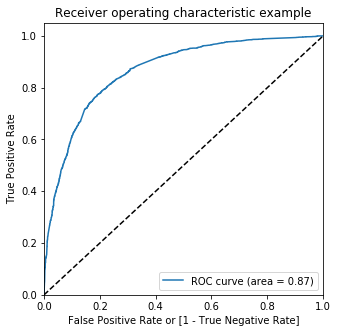

In [105]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [106]:
#Area under the curve of the ROC is 0.87 , which is good model

In [107]:
# Finding Optimal Cutoff Point
#creating columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.561147,1,1,1,1,1,1,1,0,0,0,0
1,0,0.064268,0,1,0,0,0,0,0,0,0,0,0
2,0,0.252423,0,1,1,1,0,0,0,0,0,0,0
3,0,0.806603,1,1,1,1,1,1,1,1,1,1,0
4,0,0.215354,0,1,1,1,0,0,0,0,0,0,0


In [108]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.585189  0.977291  0.343578
0.2   0.2  0.706865  0.923763  0.573213
0.3   0.3  0.773500  0.836172  0.734883
0.4   0.4  0.797774  0.756691  0.823088
0.5   0.5  0.792672  0.642336  0.885307
0.6   0.6  0.779839  0.562044  0.914043
0.7   0.7  0.760668  0.467559  0.941279
0.8   0.8  0.728355  0.341444  0.966767
0.9   0.9  0.689394  0.203163  0.989005


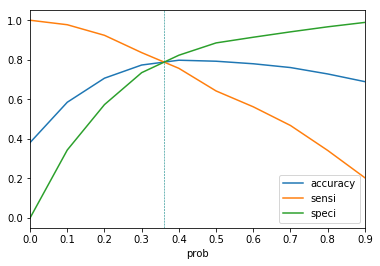

In [109]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.axvline(x=0.36, color='teal',linewidth = 0.55, linestyle='--')
plt.show()

In [110]:
#around 0.36,we get the optimal values of the three metrics. So let's choose 0.36 as cutoff now.

y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.36 else 0)

y_train_pred_final.head()


,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.561147,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.064268,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.252423,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.806603,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.215354,0,1,1,1,0,0,0,0,0,0,0,0


In [111]:
# Let's create the confusion matrix once again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3169,  833],
       [ 522, 1944]], dtype=int64)

In [112]:
logreg_all_metrics(confusion2)

True Negative                    :  3169
True Positive                    :  1944
False Negative                   :  522
False Positve                    :  833
Model Accuracy                   :  0.7905
Model Sensitivity                :  0.7883
Model Specificity                :  0.7919
Model Precision                  :  0.7
Model Recall                     :  0.7883
Model True Positive Rate (TPR)   :  0.7883
Model True Negative Rate (TPR)   :  0.7919
Model False Positive Rate (FPR)  :  0.2081
Model False Negative Rate (FPR)  :  0.2117


In [113]:
#Making Predictions on the Test Set
# Scale the test set using transform
num_cols = X_test.select_dtypes(include=["int64", "float64"]).columns
X_test[num_cols] = scaler.transform(X_test[num_cols])

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [114]:
# Select the columns in X_train for X_test 

X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Facebook,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Hospitality Management,Specialization_International Business,Specialization_Rural and Agribusiness,Specialization_Unknown
4269,0.964504,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2376,-0.885371,0,1,0,0,1,0,0,0,0,1,0,0,0,1
7766,-0.777416,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9199,-0.885371,0,0,0,1,0,0,0,1,0,0,0,0,0,1
4359,-0.885371,0,1,0,0,1,0,1,0,0,0,0,0,0,0


In [115]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [116]:
# Check X_test_sm

X_test_sm.head()

,const,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Facebook,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Hospitality Management,Specialization_International Business,Specialization_Rural and Agribusiness,Specialization_Unknown
4269,1.0,0.964504,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2376,1.0,-0.885371,0,1,0,0,1,0,0,0,0,1,0,0,0,1
7766,1.0,-0.777416,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9199,1.0,-0.885371,0,0,0,1,0,0,0,1,0,0,0,0,0,1
4359,1.0,-0.885371,0,1,0,0,1,0,1,0,0,0,0,0,0,0


In [117]:
# Drop the 'Lead Origin_Lead Add Form', 'Specialization_Rural and Agribusiness', 'Lead Source_Facebook' columns from X_test as well

X_test.drop(['Lead Origin_Lead Add Form', 'Specialization_Rural and Agribusiness', 'Lead Source_Facebook'],axis=1, inplace = True)

In [118]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res4.predict(sm.add_constant(X_test))

In [119]:
y_test_pred[:10]

4269    0.704326
2376    0.873029
7766    0.450129
9199    0.058250
4359    0.913066
9186    0.554773
1631    0.472220
8963    0.154518
8007    0.088214
5324    0.339925
dtype: float64

In [120]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [121]:
# Let's see the head

y_pred_1.head()

,0
4269,0.704326
2376,0.873029
7766,0.450129
9199,0.058250
4359,0.913066


In [122]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [123]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [124]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [125]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.704326
1,1,0.873029
2,1,0.450129
3,0,0.058250
4,1,0.913066


In [126]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [127]:
#  head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.704326
1,1,0.873029
2,1,0.450129
3,0,0.058250
4,1,0.913066


In [128]:
# Make predictions on the test set using 0.36 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.36 else 0)

In [129]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.704326,1
1,1,0.873029,1
2,1,0.450129,1
3,0,0.058250,0
4,1,0.913066,1


In [130]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7857142857142857

In [131]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1331,  346],
       [ 248,  847]], dtype=int64)

In [132]:
logreg_all_metrics(confusion2)

True Negative                    :  1331
True Positive                    :  847
False Negative                   :  248
False Positve                    :  346
Model Accuracy                   :  0.7857
Model Sensitivity                :  0.7735
Model Specificity                :  0.7937
Model Precision                  :  0.71
Model Recall                     :  0.7735
Model True Positive Rate (TPR)   :  0.7735
Model True Negative Rate (TPR)   :  0.7937
Model False Positive Rate (FPR)  :  0.2063
Model False Negative Rate (FPR)  :  0.2265


In [133]:
#Precision-Recall 
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3543,  459],
       [ 882, 1584]], dtype=int64)

In [134]:
logreg_all_metrics(confusion)

True Negative                    :  3543
True Positive                    :  1584
False Negative                   :  882
False Positve                    :  459
Model Accuracy                   :  0.7927
Model Sensitivity                :  0.6423
Model Specificity                :  0.8853
Model Precision                  :  0.7753
Model Recall                     :  0.6423
Model True Positive Rate (TPR)   :  0.6423
Model True Negative Rate (TPR)   :  0.8853
Model False Positive Rate (FPR)  :  0.1147
Model False Negative Rate (FPR)  :  0.3577


In [135]:
## Precision and recall tradeoff
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       0
 5       1
 6       0
 7       1
 8       0
 9       1
 10      1
 11      0
 12      1
 13      1
 14      0
 15      0
 16      0
 17      0
 18      0
 19      1
 20      1
 21      1
 22      1
 23      1
 24      1
 25      1
 26      0
 27      1
 28      1
 29      0
        ..
 6438    1
 6439    0
 6440    1
 6441    1
 6442    0
 6443    0
 6444    0
 6445    0
 6446    0
 6447    0
 6448    0
 6449    0
 6450    1
 6451    1
 6452    1
 6453    1
 6454    1
 6455    1
 6456    1
 6457    1
 6458    0
 6459    1
 6460    1
 6461    0
 6462    1
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64, 0       1
 1       0
 2       0
 3       1
 4       0
 5       1
 6       0
 7       1
 8       0
 9       1
 10      1
 11      0
 12      0
 13      0
 14      0
 15      0
 16      0
 17      0
 18      0
 19      0
 20      1
 21      1
 22      1
 23      1
 24      1
 25      

In [136]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

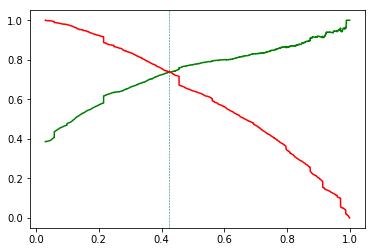

In [137]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.425, color='teal',linewidth = 0.55, linestyle='--')
plt.show()

In [138]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.425 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.561147,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.064268,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.252423,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.806603,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.215354,0,1,1,1,0,0,0,0,0,0,0,0


In [139]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3353,  649],
       [ 643, 1823]], dtype=int64)

In [140]:
logreg_all_metrics(confusion2)

True Negative                    :  3353
True Positive                    :  1823
False Negative                   :  643
False Positve                    :  649
Model Accuracy                   :  0.8002
Model Sensitivity                :  0.7393
Model Specificity                :  0.8378
Model Precision                  :  0.7375
Model Recall                     :  0.7393
Model True Positive Rate (TPR)   :  0.7393
Model True Negative Rate (TPR)   :  0.8378
Model False Positive Rate (FPR)  :  0.1622
Model False Negative Rate (FPR)  :  0.2607


In [141]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res4.predict(sm.add_constant(X_test))

In [142]:
y_test_pred[:10]

4269    0.704326
2376    0.873029
7766    0.450129
9199    0.058250
4359    0.913066
9186    0.554773
1631    0.472220
8963    0.154518
8007    0.088214
5324    0.339925
dtype: float64

In [143]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [144]:
# Let's see the head

y_pred_1.head()

,0
4269,0.704326
2376,0.873029
7766,0.450129
9199,0.058250
4359,0.913066


In [145]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [146]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [147]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [148]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.704326
1,1,0.873029
2,1,0.450129
3,0,0.058250
4,1,0.913066


In [149]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [150]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.704326
1,1,0.873029
2,1,0.450129
3,0,0.058250
4,1,0.913066


In [151]:
# Make predictions on the test set using 0.425 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.425 else 0)

In [152]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1406,  271],
       [ 299,  796]], dtype=int64)

In [153]:
logreg_all_metrics(confusion2)

True Negative                    :  1406
True Positive                    :  796
False Negative                   :  299
False Positve                    :  271
Model Accuracy                   :  0.7944
Model Sensitivity                :  0.7269
Model Specificity                :  0.8384
Model Precision                  :  0.746
Model Recall                     :  0.7269
Model True Positive Rate (TPR)   :  0.7269
Model True Negative Rate (TPR)   :  0.8384
Model False Positive Rate (FPR)  :  0.1616
Model False Negative Rate (FPR)  :  0.2731


## Lead Score

In [154]:
y_pred_final['Lead_Score'] = y_pred_final['Conversion_Prob'].map( lambda x: round(x*100))
y_pred_final.head(10)

,Converted,Conversion_Prob,final_predicted,Lead_Score
0,1,0.704326,1,70
1,1,0.873029,1,87
2,1,0.450129,1,45
3,0,0.058250,0,6
4,1,0.913066,1,91
5,1,0.554773,1,55
6,1,0.472220,1,47
7,1,0.154518,0,15
8,0,0.088214,0,9
9,1,0.339925,0,34


## Train Data Set

Model Accuracy                   :  0.7905

Model Sensitivity                :  0.7883

Model Specificity                :  0.7919

## Test Data Set 

Model Accuracy                   :  0.7944

Model Sensitivity                :  0.7269

Model Specificity                :  0.8384

#### We can see that the evaluation matrics are close, so we can consider that the model is consisent with an Accuracy of 79%

In [155]:
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2888.4
Date:                Mon, 17 Jun 2024   Deviance:                       5776.7
Time:                        21:02:47   Pearson chi2:                 6.65e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.6554      0.136     -4.805      0.000      -0.923      -0.388
Total Time Spent on Website               1.0684      0.038     28.269      0.000       0.994       1.142
Lead Origin_Landing Page Submission      -1.4068      0.121    -11.635      0.000      -1.644      -1.170
Lead Source_Olark Chat                    0.9306      0.116      8.032      0.000       0.703       1.158
Lead Source_Reference                     3.0364      0.211     14.413      0.000       2.623       3.449
Lead Source_Welingak Website              5.3805      0.728      7.388      0.000       3.953       6.808
Last Activity_Email Opened                0.9166      0.100      9.147      0.000       0.720       1.113
Last Activity_Olark Chat Conversation    -0.5734      0.181     -3.165      0.002      -0.929      -0.218
Last Activity_Others                      1.2859      0.229      5.611      0.000       0.837       1.735
Last Activity_SMS Sent                    2.0317      0.103     19.694      0.000       1.830       2.234
Specialization_Hospitality Management    -1.0198      0.303     -3.368      0.001      -1.613      -0.426
Specialization_International Business    -0.5404      0.244     -2.216      0.027      -1.018      -0.062
Specialization_Unknown                   -1.5388      0.118    -13.069      0.000      -1.770      -1.308
=========================================================================================================
"""

Positive Contribution to Lead scoring attibutes are:
    * Lead Source - Welingak Website
    * Lead Source - Reference
    * Last Activity - SMS Sent

Negative Contribution to Lead scoring attibutes are:
    * Specialization - Unknown
    * Lead Origin - Landing Page Submission
    * Specialization - Hospitality Management

### Ways to increase lead scroing
    * Can be more focued on postive coefficients which gives more on marketing strategies.
    * Top Lead sources can make positive impact on the leading score
    * Last acticities are acting as both postive and negative so if it focus in proper way then it can improve the performance
    * Make advancement in the website so if the person stays for a long time then there is chances of them converting in to Lead which we can see in total time spent in Website
    * Advertisement can be improved so that there is positive impact
    * Monitoring the Last activity can also help in contacting the users
    * Improvement is required in few specialization as there is low coeffient rates or can concentrate on them later
    * Olark Chat Conversation should be improved or it will impact on lead scoring
    * Improve Landing page submission or get to know what is causing the leads to stop using the website

### Happy learning!!!